## A helper file to parse LSTM epoch/loss/dev F1 scores with regex

In [2]:
import re

In [46]:
LSTM_RE = re.compile(r'^\[reRNN\] Epoch (\d+).*Average loss=(\d+\.?\d*).*Dev F1=(\d+\.?\d*).*$')
LSTM_RE = re.compile(r'.*Epoch (\d+).*$')

LSTM_regex = ur'^\[reRNN\] Epoch (\d+).*Average loss=(\d+\.?\d*).*Dev F1=(\d+\.?\d*).*$'


In [33]:
with open("/home/antonis/results/5e7similar/LSTM_train_unlab.txt") as f:
    w = f.read()

In [45]:
print w

[reRNN] Training model
[reRNN] n_train=10786  #epochs=35  batch size=64
[reRNN] Epoch 0 (29.66s)	Average loss=0.605242	Dev F1=39.39
[reRNN] Epoch 1 (62.07s)	Average loss=0.441300	Dev F1=36.97
[reRNN] Epoch 2 (94.42s)	Average loss=0.358777	Dev F1=37.20
[reRNN] Epoch 3 (126.68s)	Average loss=0.326538	Dev F1=38.69
[reRNN] Epoch 4 (158.80s)	Average loss=0.309259	Dev F1=40.40
[reRNN] Epoch 5 (191.24s)	Average loss=0.295640	Dev F1=39.77
[reRNN] Epoch 6 (223.55s)	Average loss=0.286219	Dev F1=38.31
[reRNN] Epoch 7 (255.60s)	Average loss=0.280151	Dev F1=39.34
[reRNN] Epoch 8 (287.53s)	Average loss=0.272821	Dev F1=41.00
[reRNN] Epoch 9 (319.84s)	Average loss=0.268550	Dev F1=39.86
[reRNN] Epoch 10 (351.62s)	Average loss=0.266627	Dev F1=40.16
[reRNN] Epoch 11 (383.94s)	Average loss=0.263585	Dev F1=41.28
[reRNN] Epoch 12 (416.03s)	Average loss=0.258636	Dev F1=41.27
[reRNN] Epoch 13 (448.12s)	Average loss=0.255536	Dev F1=40.86
[reRNN] Epoch 14 (480.49s)	Average loss=0.253268	Dev F1=41.30
[reRNN] Epo

In [40]:
m = LSTM_RE.findall(s)
m

[]

In [47]:
re.match(LSTM_regex, w)

In [50]:
matches = re.finditer(LSTM_regex, s, re.MULTILINE)
matches.

AttributeError: 'callable-iterator' object has no attribute 'groups'

In [99]:
train_epochs = pd.DataFrame(re.findall(LSTM_regex, s, re.MULTILINE), columns=['epoch','training_loss', 'Validation F1'])

In [100]:
train_epochs = train_epochs.applymap(lambda x: float(x))

In [102]:
train_epochs.head()

,epoch,training_loss,Validation F1
0,0.0,0.605242,39.39
1,1.0,0.441300,36.97
2,2.0,0.358777,37.20
3,3.0,0.326538,38.69
4,4.0,0.309259,40.40


### Visualize

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("white")


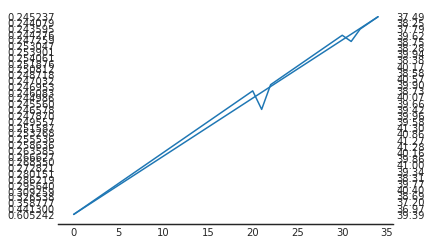

In [71]:
fig, ax = plt.subplots()
ax.plot(train_epochs['training_loss'])
ax2 =ax.twinx()
ax2.plot(train_epochs['Validation F1'])
sns.despine(ax=ax, right=True, left=True)
sns.despine(ax=ax2, left=True, right=False)
ax2.spines['right'].set_color('white')

In [81]:
train_epochs.iloc[0,0]

0.605242

Text(0.5,0,'epoch')

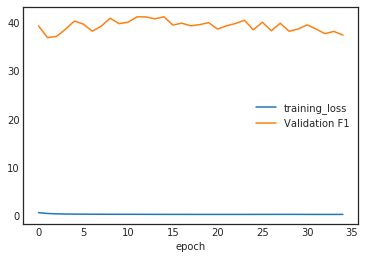

In [83]:
train_epochs.plot()
plt.xlabel("epoch")

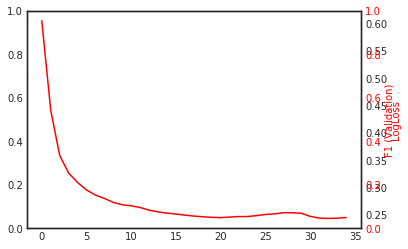

In [98]:
# fig0, ax0 = plt.subplots()
# ax1 = ax0.twinx()

# train_epochs['training_loss'].plot(stacked=True, ax=ax1, color='red')
# train_epochs['Validation F1'].plot(secondary_y=True, ax=ax2,color='green')

# # Make the y-axis label, ticks and tick labels match the line color.
# ax1.set_ylabel('LogLoss', color='red')
# # ax1.tick_params('y', colors='red')

# ax2 = ax0.twinx()
# ax2.set_ylabel('F1 (Validation)', color='r')
# ax2.tick_params('y', colors='r')

# fig.tight_layout()

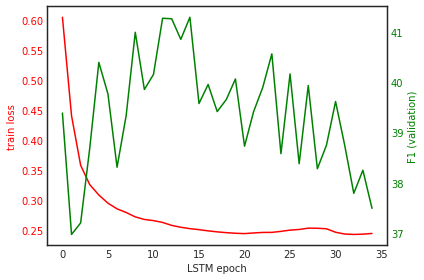

In [119]:
fig, ax1 = plt.subplots()
t = train_epochs['epoch']
s1 = train_epochs['training_loss']
ax1.plot(t, s1, 'r')
ax1.set_xlabel('LSTM epoch')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('train loss', color='r')
ax1.tick_params('y', colors='r')


ax2 = ax1.twinx()
s2 = train_epochs['Validation F1']
ax2.plot(t, s2, 'g')
ax2.set_ylabel('F1 (validation)', color='g')
ax2.tick_params('y', colors='g')

fig.tight_layout()
plt.show()

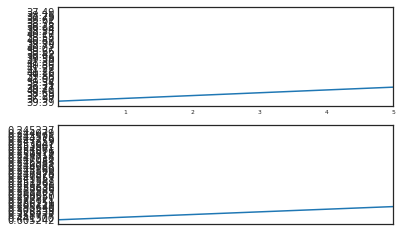

In [72]:
import matplotlib.pyplot as plt
import numpy as np

t = list(train_epochs.index)
s1 = train_epochs['Validation F1']
s2 = train_epochs['training_loss']

ax1 = plt.subplot(211)
plt.plot(t, s1)
plt.setp(ax1.get_xticklabels(), fontsize=6)

# share x only
ax2 = plt.subplot(212, sharex=ax1)
plt.plot(t, s2)
# make these tick labels invisible
plt.setp(ax2.get_xticklabels(), visible=False)

plt.xlim(0.01, 5.0)
plt.show()